In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import utils.eval_funcs as eval_funcs
import matplotlib.colors 
import json

In [11]:

plt.rcParams["font.family"] = "Liberation Serif"
plt.rcParams["font.weight"] = "bold"
plot_cfg = {
    "tick_label_size" : 50,
    "xlabel_size" : 60,
    "ylabel_size" : 60,
    "border_size" : 6,
    "bar_border_size" : 2.5,
    "bar_label_size" : 32,
    "stars_label_size" : 48,
    "annot_size" : 72,
    "legend_size" : 42,
}


[[55. 35.]
 [45. 65.]]
[[ 90.]
 [110.]]
[[100. 100.]]
[[45. 45.]
 [55. 55.]]


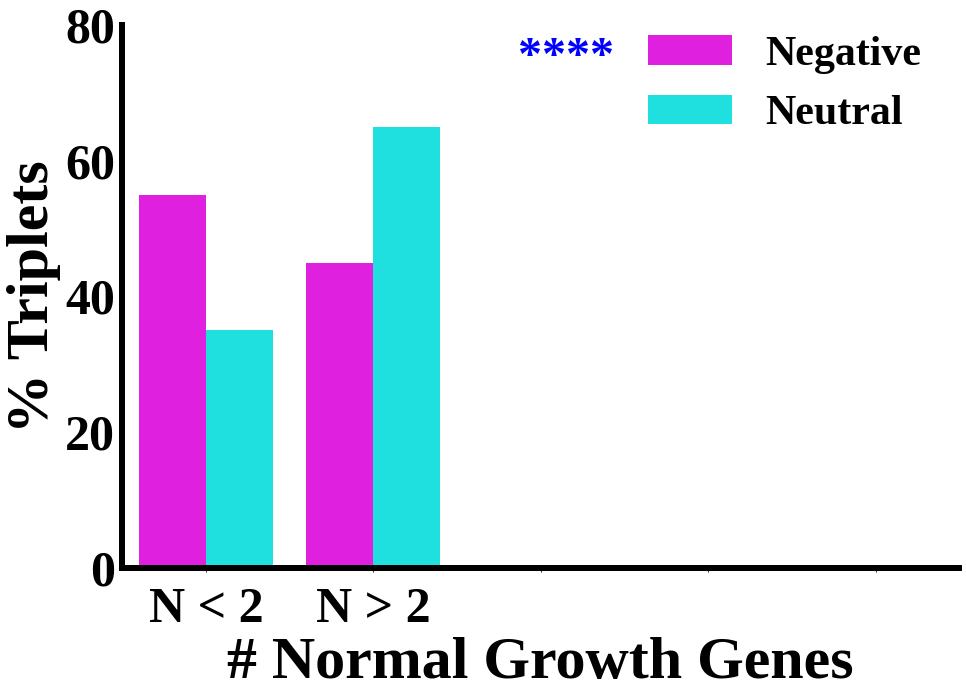

In [12]:
df = pd.DataFrame([
    {
        "hue" : "Negative",
        "x" : "N < 2",
        "y" : 55,
        "raw_y" : 55
    },
    {
        "hue" : "Negative",
        "x" : "N > 2",
        "y" : 45,
        "raw_y" : 45
    },
    {
        "hue" : "Neutral",
        "x" : "N < 2",
        "y" : 35,
        "raw_y" : 35
    },
    {
        "hue" : "Neutral",
        "x" : "N > 2",
        "y" : 65,
        "raw_y" : 65
    }
])
pallete = {
    "Negative" : "magenta",
    "Neutral" : "cyan"
}
xlabel = "# Normal Growth Genes"
ylabel = "% Triplets"
max_x_categories = 5
ylim = [0, 80]
stars_color = 'blue'

def plot_distrib(df, pallete, xlabel, ylabel, max_x_categories, ylim, stars_color, output_path):
    distinct_xs = set(df['x'])
    distinct_hues = set(df['hue'])

    dummy_rows = []

    if max_x_categories > 0:
        for i in range(max_x_categories - len(distinct_xs)):
            for hue in distinct_hues:
                dummy_rows.append({
                    "x" : " " * (i+1),
                    "y" : 0,
                    "hue" : hue
                })
    final_df = pd.concat((df, pd.DataFrame(dummy_rows)))

    f, ax = plt.subplots(1, 1, figsize=(15, 10))
    g = sns.barplot(x="x", 
                    y="y", 
                    hue="hue",
                    ax=ax,
                    data=final_df, 
                    palette=pallete)
    ax.yaxis.set_tick_params(labelsize=plot_cfg['tick_label_size'])
    ax.xaxis.set_tick_params(labelsize=plot_cfg['tick_label_size'], pad=15)
    ax.set_ylabel(ylabel, fontsize=plot_cfg['ylabel_size'], fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=plot_cfg['xlabel_size'], fontweight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.setp(ax.spines.values(),linewidth=plot_cfg["border_size"], color='black')
    if ylim != None:
        ax.set_ylim(ylim)

    # construct R
    xs = list(distinct_xs)
    hues = list(distinct_hues)
    R = np.zeros((len(xs), len(hues)))
    for i in range(len(xs)):
        for j in range(len(hues)):
            R[i, j] = df[(df['x'] == xs[i]) & (df['hue'] == hues[j])]['raw_y']
    chisq, p, ddof = eval_funcs.chi2(R)
    stars = '*' * eval_funcs.compute_stars(p, 0.05)
    ax.legend(frameon=False, fontsize=plot_cfg['legend_size'], loc='upper right', bbox_to_anchor=(1, 1.05), ncol=1)
    ax.text(0.53, 0.98, '****', 
        transform=ax.transAxes,
        color=stars_color, 
        ha="center", 
        va="top",
        weight='bold', 
        fontsize=plot_cfg['stars_label_size'])
    
    plt.savefig(output_path, bbox_inches='tight', dpi=100)

plot_distrib(df, pallete, xlabel, ylabel, max_x_categories, ylim, stars_color, '../tmp/test.png')

# Generate sGO Terms Data

# Amino Acid Humans

In [13]:
from Bio import SeqIO

In [14]:
lens = []
with open("../data-sources/human/gencode.v32.pc_translations.fa") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        lens.append(len(record.seq))

In [15]:
import numpy as np

In [16]:
np.mean(lens)

378.99051759380205

In [17]:
np.max(lens)

35991

In [18]:
np.min(lens)

1

(array([9.870e+04, 1.354e+03, 1.850e+02, 2.600e+01, 1.800e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00]),
 array([1.00000e+00, 1.80050e+03, 3.60000e+03, 5.39950e+03, 7.19900e+03,
        8.99850e+03, 1.07980e+04, 1.25975e+04, 1.43970e+04, 1.61965e+04,
        1.79960e+04, 1.97955e+04, 2.15950e+04, 2.33945e+04, 2.51940e+04,
        2.69935e+04, 2.87930e+04, 3.05925e+04, 3.23920e+04, 3.41915e+04,
        3.59910e+04]),
 <BarContainer object of 20 artists>)

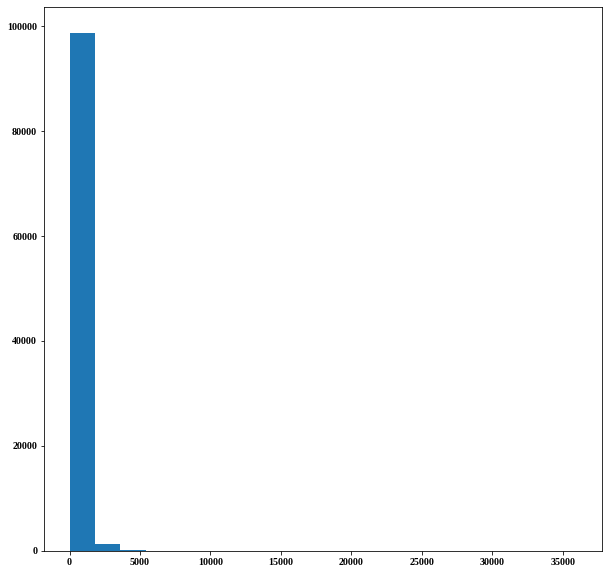

In [21]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax.hist(lens, bins=20)

In [22]:
np.median(lens)

230.0

In [28]:
import sklearn.model_selection
import keras.utils
import pandas as pd
import numpy as np
import numpy.random as rng

In [4]:
df = pd.read_csv("../generated-data/task_yeast_gi_hybrid")

In [6]:
df

,a,b,bin,a_id,b_id
0,ycr065w hcm1,ylr268w sec22,0,541,3307
1,yel043w yel043w,ylr268w sec22,0,1278,3307
2,ygr252w gcn5,ynl136w eaf7,0,2003,3988
3,ybr221c pdb1,ydr158w hom2,0,379,913
4,yer111c swi4,ynl233w bni4,0,1410,4068
...,...,...,...,...,...
6918865,ybr162w-a ysy6,ycr073c ssk22,1,327,546
6918866,yer186c yer186c,ynl006w lst8,1,1480,3876
6918867,ygl226w mtc3,ykl191w dph2,1,1770,2921
6918868,ybl102w sft2,ydr231c cox20,1,181,981


In [40]:
bins = np.array(df['bin'])
bins = keras.utils.to_categorical(bins)
sss = sklearn.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.8)

In [41]:
print("Class props:")
print(np.sum(bins, axis=0) / np.sum(bins))
for train_ix, test_ix in sss.split(np.zeros(bins.shape[0]), bins):

        print(train_ix.shape)
        print(test_ix.shape)

        print("Train props:")
        print(np.sum(bins[train_ix, :], axis=0) / np.sum(bins[train_ix]))

        print("Test props:")
        print(np.sum(bins[test_ix, :], axis=0) / np.sum(bins[test_ix]))

    

Class props:
[2.8383248e-03 9.9692029e-01 1.4800104e-04 9.3367846e-05]
(1383774,)
(5535096,)
Train props:
[2.8386139e-03 9.9691999e-01 1.4814558e-04 9.3223316e-05]
Test props:
[2.8382526e-03 9.9692041e-01 1.4796491e-04 9.3403978e-05]


In [42]:
indecies = np.arange(df.shape[0])
rng.shuffle(indecies)

n_train = int(0.5 * df.shape[0])
train_ix = indecies[:n_train]
test_ix = indecies[n_train:]

In [43]:
train_df = df.iloc[train_ix]
test_df = df.iloc[test_ix]

In [44]:
train_genes = set(train_df['a_id']) | set(train_df['b_id'])
test_genes = set(test_df['a_id']) | set(test_df['b_id'])

In [45]:
novel_genes = test_genes - train_genes
len(novel_genes)

55

In [46]:
ix = test_df['a_id'].isin(novel_genes) & test_df['b_id'].isin(novel_genes)
np.sum(ix)

1